In [ ]:
from keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [9]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [10]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [11]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [12]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [13]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [20]:
from tqdm.notebook import tqdm

In [21]:
def extract_features(images):
    features = []
    for image_path in tqdm(images):
        img = load_img(image_path, color_mode='grayscale')  # Load image in grayscale
        img = np.array(img)
        features.append(img)
    return np.array(features)

In [22]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [23]:
test_features = extract_features(test['image']) 

  0%|          | 0/7066 [00:00<?, ?it/s]

In [24]:
x_train = train_features/255.0
x_test = test_features/255.0

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [27]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [28]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [31]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 199s 860ms/step - accuracy: 0.2370 - loss: 1.8349 - val_accuracy: 0.2583 - val_loss: 1.8111
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 201s 890ms/step - accuracy: 0.2427 - loss: 1.8106 - val_accuracy: 0.2549 - val_loss: 1.7793
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 190s 840ms/step - accuracy: 0.2519 - loss: 1.7907 - val_accuracy: 0.2973 - val_loss: 1.7193
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 181s 800ms/step - accuracy: 0.2984 - loss: 1.7098 - val_accuracy: 0.4012 - val_loss: 1.5392
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 175s 773ms/step - accuracy: 0.3706 - loss: 1.6009 - val_accuracy: 0.4624 - val_loss: 1.4169
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 174s 772ms/step - accuracy: 0.4148 - loss: 1.5018 - val_accuracy: 0.4819 - val_loss: 1.3656
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 182s 804ms/step - accuracy: 0.4424 - loss: 1.4409 - val_accuracy: 0.4960 - val_loss: 1.3218
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 190s 841ms/step - accuracy: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [37]:
from keras.models import model_from_json

In [38]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [39]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [42]:
def ef(image):
    img = load_img(image, color_mode='grayscale')  # Load image in grayscale
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature

In [51]:
image = 'images/train/fear/9.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
model prediction is  fear


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
model prediction is  angry


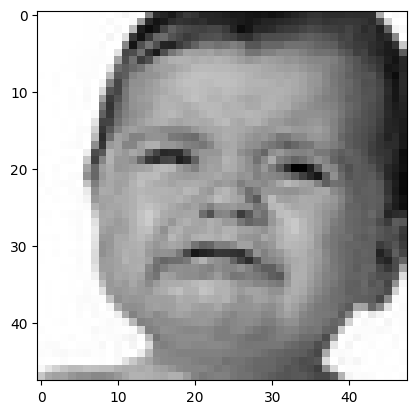

In [54]:
image = 'images/train/sad/63.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
model prediction is  sad


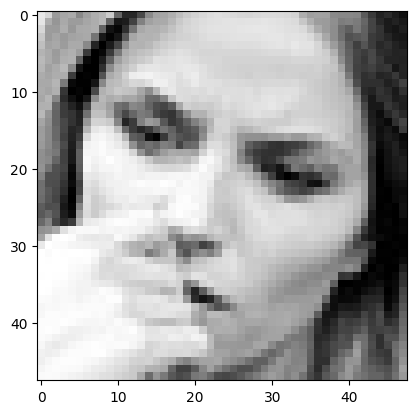

In [55]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
model prediction is  angry


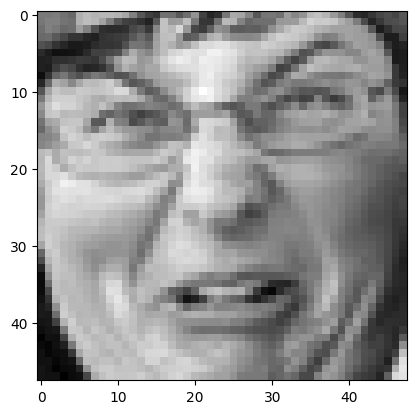

In [56]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction is  angry


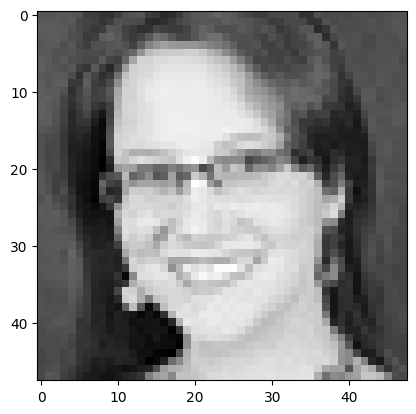

In [57]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
model prediction is  angry


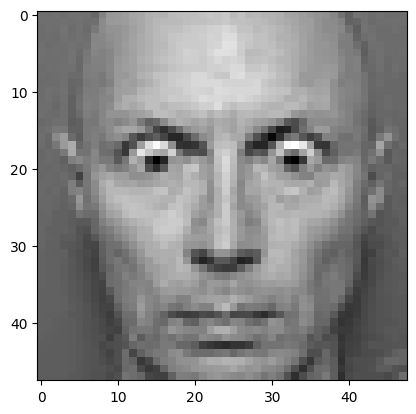

In [58]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')